In [1]:
import sys
import logging as log
log.basicConfig(format='%(asctime)s %(levelname)s: %(message)s', level=log.INFO)

sys.path.insert(0,'/Users/vadim/pythonProjects/trading')

import datareader as dr
import algo.simple as inv1
import algo.parabolic as inv2

In [40]:
df1 = dr.readfile(dir='/Users/vadim/pythonProjects/trading/data', symbol='AAPL')
print(df1.index[0])

2017-07-22 21:14:52,841 ERROR: 2000-09-28 00:00:00 close price out of range: lp: 3.4375, cp: 1.91071428571, hp: 3.84375
2017-07-22 21:14:53,933 INFO: Google DataFrame contains non-positive (likely zero) values. OK.
2017-07-22 21:14:53,935 ERROR: Yahoo and Google pandas DataFrames sizes do not match
2017-07-22 21:14:53,936 ERROR: Yahoo pandas DataFrame has indexes that Google DataFrame lacks
2017-07-22 21:14:53,938 ERROR: Yahoo and Google pandas DataFrame indexes do not match


1990-01-02 00:00:00


In [ ]:
df2 = df1['2005-01-03':'2005-01-06']
df3 = df1['2004-12-28':'2005-01-02']
print(df2, '\n\n', df3)
from dateutil.parser import parse
from datetime import datetime
from datetime import timedelta
from_date = parse('2005-01-03')
print(from_date)
print(type(from_date))
from_date_p = df2.index[1]
print(from_date_p)
print(type(from_date_p))
print(from_date_p < from_date)
df1[from_date - timedelta(7): from_date]

In [ ]:
df1[from_date - timedelta(7): from_date].rolling(5).mean()

In [ ]:
import numpy as np
df1['SAR'] = np.NaN
# UNH Stock split 2/1 happened between May 27 and May 31, 2005
df2 = df1['2005-05-26':'2005-06-01']
df2

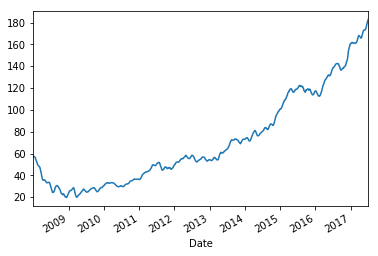

In [22]:
df2 = df1.rolling(20, min_periods=1).mean()
df2.columns = ['Mean' + x for x in df2.columns]

import matplotlib.pyplot as plt

df2 = df2['2008-01-01':'2017-07-01']
df2['MeanOpen'].plot()
plt.show()

In [41]:
# print(inv1.compute(df1, '2008-01-01', '2008-12-31'))
print(inv1.compute(df1, '2008-1-1', '2009-3-1'))
#print(inv2._is_market_up(df1, '2010-11-01'))
#inv2._create_sliding_window(df1, '2010-11-01')
#inv2._run_the_algo(df1, '2008-10-01', '2011-11-01', None, None, None)
print(inv2.compute(df1, '2008-1-1', '2009-3-1', {"af": 0.02, "afi": 0.02, "afm": 0.2}))

2017-07-22 21:14:59,260 INFO: ret1 = -54%, ret2 = -54%, returning max: -54%
2017-07-22 21:14:59,261 INFO: af = 0.02, afi = 0.02, afm = 0.2
2017-07-22 21:14:59,266 INFO: Creating sliding window: [2007-11-18 : 2007-12-18]
2017-07-22 21:14:59,283 INFO: Found entry sip after 3 iterations
2017-07-22 21:14:59,284 INFO: Entry trade date: 2007-11-12


-54


2017-07-22 21:14:59,655 INFO: [(73.868570500000004, 17.265715), (18.461130881730558, 21.494285999999999), (22.454548974000843, 26.389714399999999), (26.628809437224035, 25.954010953364843), (25.045376228159999, 24.08529395077948), (22.971428, 24.598572000000001), (20.168956670417124, 17.562826122752), (16.155079923143834, 12.406653810104), (15.903948817335369, 12.894633431747041), (13.396588081661106, 12.634285999999999), (12.857142, 13.659860016753726)]


-83


In [ ]:
df1['2015-12-25': '2017-1-3'][(df1['buy'] > 0) | (df1['sell'] > 0)]

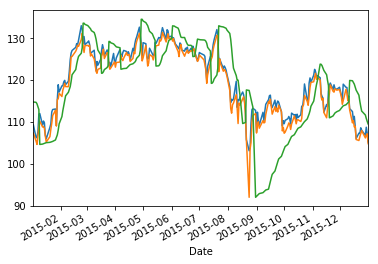

In [16]:
import matplotlib.pyplot as plt

df3 = df1['2008-01-01':'2016-01-01']
#df3 = df1['2016-05-01':'2016-06-01']
df3['Close'].plot()
df3['Low'].plot()
df3['SAR'].plot()
plt.show()

In [ ]:
df3 = df1.loc['2017-05-01':'2017-07-01']

import matplotlib.finance as pltfin
import matplotlib.pyplot as plt
%matplotlib inline
#ax = plt.axes()
fig, ax = plt.subplots()
pltfin.candlestick2_ochl(ax, df3['Open'], df3['Close'], df3['High'], df3['Low'], width=0.6, colorup='g', colordown='r', alpha=0.5)

from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

# format the ticks
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
#ax.xaxis.set_minor_formatter(dayFormatter)

ax.grid(True)

# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.fmt_xdata = DateFormatter('%Y-%m-%d')
#ax.fmt_ydata = price
ax.grid(True)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()